In [100]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [101]:
# Read in the file
df = pd.read_csv("data_2023.csv")
df

C:\Users\tousi\AppData\Local\Temp\ipykernel_13212\2493737168.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data_2023.csv")


,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,February,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,March,Aaron Maashoh,-500,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,April,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,May,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,Nicks,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133256,High_spent_Large_value_payments,479.866228,Poor
99996,May,Nicks,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595029,High_spent_Medium_value_payments,496.65161,Poor
99997,June,Nicks,25,Mechanic,39628.99,3359.415833,4,6,5729,2,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847745,High_spent_Large_value_payments,516.809083,Poor
99998,July,Nicks,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.6725822,Low_spent_Large_value_payments,319.164979,Standard


Data Cleaning

In [102]:
# Drop rows where specific columns are null
df = df.dropna(subset=['Month','Age','Occupation','Annual_Income','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Changed_Credit_Limit',"Credit_Mix","Outstanding_Debt","Credit_Utilization_Ratio","Credit_History_Age","Payment_of_Min_Amount","Total_EMI_per_month","Amount_invested_monthly","Payment_Behaviour","Num_of_Delayed_Payment"])


In [ ]:
# Drop rows where there are negative values
df.drop(df[df["Monthly_Inhand_Salary"] <0 ].index,inplace=True)

df.drop(df[df["Num_Bank_Accounts"] < 0].index, inplace=True)
df.drop(df[df["Num_Credit_Card"]<0].index,inplace=True)
df.drop(df[df["Changed_Credit_Limit"].str.contains("_")].index,inplace=True)



In [ ]:
# Remove _ in the Age column
df["Age"] = df["Age"].str.replace("_","")

# Convert Age column to integer
df["Age"] = pd.to_numeric(df["Age"])

# Drop rows according conditions
df.drop(df.loc[(df.Age < 0) | (df.Age == 0) | (df.Age > 120)].index, inplace=True)

In [ ]:
# Remove _ in the Annual_Income column
df["Annual_Income"] = df["Annual_Income"].str.replace("_","")

In [ ]:
# Convert Annual_Income to a float data type
df["Annual_Income"].astype(float)

In [107]:
# Fill Occupation data with null if the data contains _______
df.loc[df["Occupation"].str.contains("_______"),"Occupation"] = np.nan

In [ ]:
# Remove _ in the Num_of_Loan column
df["Num_of_Loan"] = df["Num_of_Loan"].str.replace("_","")

#Convert Num_of_Loan column to integer
df["Num_of_Loan"] = pd.to_numeric(df["Num_of_Loan"])

In [ ]:
# Take absolute values
df["Num_Bank_Accounts"] = df["Num_Bank_Accounts"].abs()
df["Num_Credit_Card"] = df["Num_Credit_Card"].abs()

In [110]:
# Set Num_of_Loan data to 0 if their values are negative
df.loc[df["Num_of_Loan"] < 0,"Num_of_Loan" ] = 0

,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
3,April,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
5,June,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.43017233,!@9#%8,340.4792118,Good
6,July,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674,Low_spent_Small_value_payments,244.5653167,Good
8,January,Rick Rothackerj,28,NaN,34847.84,3037.986667,2,4,6,1,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.6906269,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,March,Nicks,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.5814027,High_spent_Medium_value_payments,410.256158,Poor
99995,April,Nicks,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133256,High_spent_Large_value_payments,479.866228,Poor
99996,May,Nicks,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595029,High_spent_Medium_value_payments,496.65161,Poor
99997,June,Nicks,25,Mechanic,39628.99,3359.415833,4,6,5729,2,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847745,High_spent_Large_value_payments,516.809083,Poor


In [ ]:
# Remove _ in the Num_of_Delayed_Payment column
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].str.replace("_","")

In [ ]:
# Convert Num_of_Delayed_Payment into integer format
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].astype(int)

In [113]:
# Change value of Credit_Mix row 
df.loc[df["Credit_Mix"] == "_", "Credit_Mix"] = "Unknown"

In [ ]:
# Remove _ in the Outstanding_Debt column
df["Outstanding_Debt"] = df["Outstanding_Debt"].str.replace("_","")

In [ ]:
# Alter data type of Outstanding_Debt
df["Outstanding_Debt"] = df["Outstanding_Debt"].astype(float)

In [ ]:
# Create new column to store calculation of total months
def update(row):
    list = row.split()
    value = (int(list[0])*12) + int(list[3])
    return value
df["Total_CHA"] = df["Credit_History_Age"].apply(update)

In [ ]:
# Remove _ in the Amount_invested_monthly column
df["Amount_invested_monthly"]= df["Amount_invested_monthly"].str.replace("_","")

In [ ]:
# Alter data type of Amount_invested_monthly
df["Amount_invested_monthly"].astype(float)

In [ ]:
# Alter row of Payment_Behaviour if it contains certain characters
df["Payment_Behaviour"] = df["Payment_Behaviour"].replace("^!@.*","Unknown",regex=True)

In [ ]:
# Remove _ in the Monthly_Balance column and convert it to float data type
df["Monthly_Balance"] = df["Monthly_Balance"].str.replace("_","").astype(float)

In [ ]:
# Convert Changed_Credit_Limit to float data type
df["Changed_Credit_Limit"].astype(float)

In [ ]:
# Takes next value if a string is null
string_attributes = df.select_dtypes(include=["object"]).columns
df[string_attributes] = df[string_attributes].fillna(method = "ffill")

# Takes previous value if a numerical value is null
numerical_attributes = df.select_dtypes(include=["int","float"]).columns
df[numerical_attributes] = df[numerical_attributes].fillna(method="bfill")

In [125]:
# If Monthly_Balance is negative, set it to 0
df.loc[df["Monthly_Balance"]<0,"Monthly_Balance"] = 0

In [ ]:
# Keep only first index of the Type_of_Loan string
list = df["Type_of_Loan"]
values = []
for i in list:
    values.append(i.split(", ")[0])
    
df["Type_of_Loan"] = values

Data Visualization

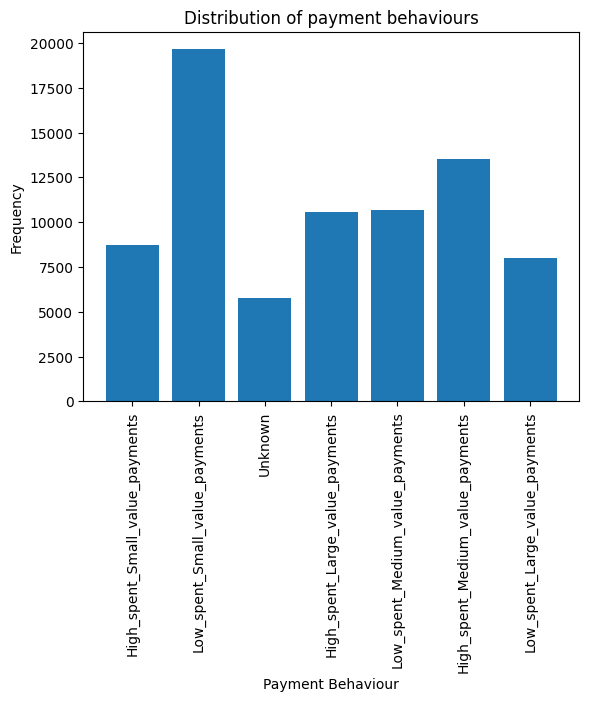

In [150]:
# Visualisation to view the distribution of customer payment behaviour
labels = df["Payment_Behaviour"].unique()
values = []
for i in labels:
    values.append(df.loc[df["Payment_Behaviour"] == i].count()[0])
plt.bar(labels, values)
plt.xticks(rotation = 90)
plt.title("Distribution of payment behaviours")
plt.xlabel("Payment Behaviour")
plt.ylabel("Frequency")
plt.show()

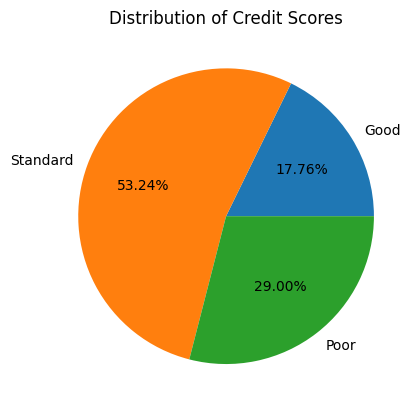

In [151]:
# Visualisation to view Credit Score distribution of customers
labels = df["Credit_Score"].unique()
values = []
for i in labels:
    values.append(df.loc[df["Credit_Score"] == i].count()[0])

plt.pie(values, labels = labels,autopct="%.2f%%")
plt.title("Distribution of Credit Scores")
plt.show()

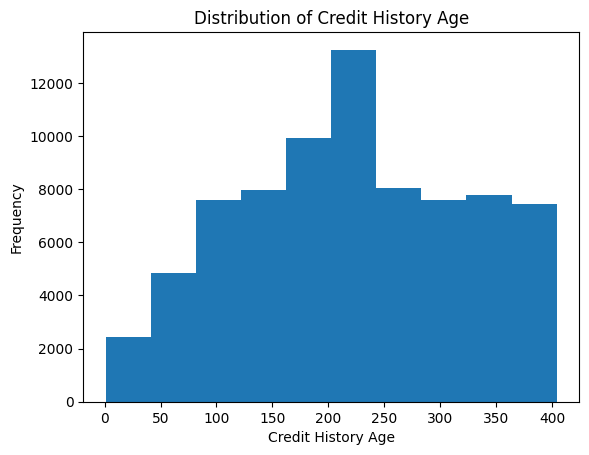

In [152]:
# Visualisation to view the distribution of credit history age
plt.hist(df["Total_CHA"])
plt.title("Distribution of Credit History Age")
plt.xlabel("Credit History Age")
plt.ylabel("Frequency")
plt.show()

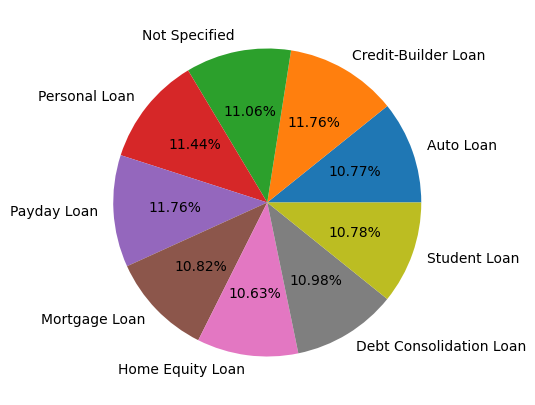

In [165]:
# Customers loan distribution visualisation
labels = df["Type_of_Loan"].unique()
values = []

for i in labels:
    values.append(df.loc[df["Type_of_Loan"] == i].count()[0])
plt.figure(figsize = (20,5))
plt.pie(values, labels = labels,autopct="%.2f%%")

plt.show()